_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [5]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Endemic Species Planting  in laneways</div>

<div class="usecase-authors"><b>Authored by: </b>Alison Collins</div>

<div class="usecase-duration"><b>Duration:</b>90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>beginner</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<div class="usecase-section-header">Scenario</div>

I am a resident living in Melbourne who wishes to take part in the greening Melbourne's laneways program. I want to know the best native species to plant near me.

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- know the endemic plants suited to your laneway

<div class="usecase-section-header">Why the interest in laneway greenery?<div>

The benefits of planting vegetation in cities includes:
- oxygen production for fresh air to breathe
- storage of carbon dioxide, helping reduce green house gases
- trees absorb water, helping reduce flooding events
- evapotranspiration from leaves produces a cooling effect, reducing heat waves
- provide habitats for wildlife
- trees reduce cortisol in our brains, improving mental health and wellbeing
More information:
https://www.treesforcities.org/stories/trees-in-our-cities-10-reasons-we-need-to-plant-more

Why plant native species?
- these species are naturally homes to native wildlife, so encourging native wildlife numbers
- they are adapted to the environment, requiring less time in maintinence
- helps prevent biodiversity, reduing species loss and regaining historical species balance
More information: https://resources.austplants.com.au/information/gardening-with-native-plants/






<div class="usecase-section-header">Relevant datasets<div>

[Pre-Colonial Plant List](https://data.melbourne.vic.gov.au/explore/dataset/pre-colonial-plant-list/export/)

- The flora of Melbourne species list was compared again histroical observation records and specimens to determine historical occurence of flora in the city. Plant names as well as growing environment can be found in this dataset.

[Laneways with Greening Potential](https://data.melbourne.vic.gov.au/explore/dataset/laneways-with-greening-potential/export/)
- The City of Melbourne collected data analysing the best potential type of plantings in each of the city laneways; farm plantings, park species, vertically growing species and forest type species. Each type of planting was given a categorical value of potential for types of planting: Highest, Good, Some or Lowest. For analysis these categorical values were converted into numerical values using the following table:
| Categorical Value | New Value |
|:-----------------:|:---------:|
| Highest Potential |     4     |
|   Good Potential  |     3     |
|   Some Potential  |     2     |
| Lowest Potential  |     1     |




### SECTION 1: Data Import using City of Melbourne API v2.1

In [1]:
# Import required modules
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function to get data from website using API
def get_data(base, data_url, offset=0):    
    # Set the filters, limit retrieves 20 rows at a time, offset says where to start data collection
    filters = f'records?limit={50}&offset={offset}&timezone=UTC'
    # Make the url from base, data url and filters variables stored ouside loop
    url = f'{base}{data_url}/{filters}'
    # Use the requests function to get the data
    result = requests.get(url)
    # Check that the request works, error code 200 = successful
    if result.status_code == 200:
        # Save results as a json file
        result_json = result.json()
        # Store a variable of max_results with total of dataset
        max_results = result_json['total_count']
        # Save the results key data to a list variable
        records = result_json['results']
    else:
        # If data is not collected correctly return the error
        print("ERROR GETTING DATA: ", result.status_code)
        max_results = 0
        records = []
    # At end of function, return the json results in records, max_results count and offset
    return [records, max_results, offset]


# COLLECT PRE COLONIAL PLANTLIST DATA FROM API
# Set offset increment
# (needs to match offset in get data function)
OFFSET_INCREMENT = 50
# Base url (this should be the same for all datasets)
BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# Set specific url 
# (change this variable for the dataset you are working with)
SPECIFIC_PATH = 'pre-colonial-plant-list'
# Call the get data function, passing in variables above, save to result
result = get_data(BASE_URL, SPECIFIC_PATH)
# Save the records data returned in the get_data function to records list variable
records = result[0]
# Save the dataset size data returned in the get_data function to max_results variable
max_results = result[1] 
# Increase the offset returned in the get_data function (result[2]) by the offset increment
offset = result[2] + OFFSET_INCREMENT
# Check the length of the data returned and compare it against the max_results variable
# If the length o fthe data is less than the max_results, run the while loop
while len(records) != max_results:
    # Call the get data function again, passing in url, specific path and new offset value
    data = get_data(BASE_URL, SPECIFIC_PATH, offset)
    # Add the data collected to the existing records list
    records += data[0]
    # Increase the offset by the offset increment
    offset += OFFSET_INCREMENT
# Convert the records list of dictionaries into a pandas dataframe 
plant_df_full = pd.DataFrame(records)
# Print the dataframe
plant_df_full.head(3)  

,species,common_name_s,certain,beach_and_dunes,saltmarsh,coastal_marshlands_and_brackish_flats,swamp_scrub,woodlands_and_heathlands_on_sand,woodlands_and_forests_on_sedimentary_hills_valleys_and_ridges,grasslands_and_woodlands_on_fertile_plains,cliffs_and_escarpments,river_banks_and_creeklines,wet_heathland,freshwater_wetland,saltwater_wetland,most_likely_occurrence,epbc_category_of_threat,ffg_extinction_risk,ffg_category_of_threat
0,Acacia mucronata var. longifolia,"Narrow-leaf Wattle, Variable Sallow Wattle",NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,None,None,None
1,Acacia pycnantha,Golden Wattle,1.0,0.0,0.0,0.0,1.0,2.1,3.2,3.1,2.1,2.1,0.0,0.0,0,3.2,None,None,None
2,Acacia verticillata var. verticillata,Prickly Moses,NaN,0.0,0.0,0.0,3.1,3.1,0.0,0.0,0.0,3.1,1.0,0.0,0,3.1,None,None,None


In [3]:
# COLLECT LANEWAYS WITH GREENING POTENTIAL DATA FROM API
# Set offset increment
# (needs to match offset in get data function)
OFFSET_INCREMENT = 50
# Base url (this should be the same for all datasets)
BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# Set specific url 
# (change this variable for the dataset you are working with)
SPECIFIC_PATH = 'laneways-with-greening-potential'
# Call the get data function, passing in variables above, save to result
result = get_data(BASE_URL, SPECIFIC_PATH)
# Save the records data returned in the get_data function to records list variable
records = result[0]
# Save the dataset size data returned in the get_data function to max_results variable
max_results = result[1] 
# Increase the offset returned in the get_data function (result[2]) by the offset increment
offset = result[2] + OFFSET_INCREMENT
# Check the length of the data returned and compare it against the max_results variable
# If the length o fthe data is less than the max_results, run the while loop
while len(records) != max_results:
    # Call the get data function again, passing in url, specific path and new offset value
    data = get_data(BASE_URL, SPECIFIC_PATH, offset)
    # Add the data collected to the existing records list
    records += data[0]
    # Increase the offset by the offset increment
    offset += OFFSET_INCREMENT
# Convert the records list of dictionaries into a pandas dataframe 
lane_df_full = pd.DataFrame(records)
# Print the dataframe
lane_df_full.head(3)  

,geo_point_2d,geo_shape,segid_1,mapbase_mc,insol_scor,verticalsu,segid,driveways,parklane,objectid,...,farmlane,walls,farm_rank,vert_rank,fores_rank,forest,park_rank,binsperct,mapbase_1,wsud
0,"{'lon': 144.9623447558369, 'lat': -37.81980050...","{'type': 'Feature', 'geometry': {'coordinates'...",10714,10714.0,6.492595,0.000000,10714,1,53.830526,1,...,58.518386,Probably Unsuitable,Highest Potential,Lowest potential,Lowest potential,0.000000,Highest potential,0.0,Banana Alley,Probably Unsuitable
1,"{'lon': 144.97170834375964, 'lat': -37.8109763...","{'type': 'Feature', 'geometry': {'coordinates'...",20229,20229.0,2.215613,0.000000,20229,2,0.000000,5,...,0.000000,Probably Unsuitable,Lowest potential,Lowest potential,Good potential,49.153357,Lowest potential,60.0,Harwood Place,Consider
2,"{'lon': 144.97244046374837, 'lat': -37.8111115...","{'type': 'Feature', 'geometry': {'coordinates'...",20230,20230.0,2.750935,63.214997,20230,0,0.000000,6,...,0.000000,Consider,Lowest potential,Highest potential,Lowest potential,0.000000,Lowest potential,60.0,Turnbull Alley,Consider


### SECTION 2: Data Pre-processing

In [4]:
# Drop columns from plantlist data frame
plant_df = plant_df_full[['species','common_name_s','woodlands_and_forests_on_sedimentary_hills_valleys_and_ridges','grasslands_and_woodlands_on_fertile_plains','cliffs_and_escarpments']]
# Check if any columns have na values
print(plant_df.isnull().any())
# Rename columns to match laneways data set
plant_df.columns.values[2:5] =["fores_rank", "park_rank","vert_rank"]
# Print final plant list dataframe
plant_df.head(3)

species                                                          False
common_name_s                                                    False
woodlands_and_forests_on_sedimentary_hills_valleys_and_ridges    False
grasslands_and_woodlands_on_fertile_plains                       False
cliffs_and_escarpments                                           False
dtype: bool


,species,common_name_s,fores_rank,park_rank,vert_rank
0,Acacia mucronata var. longifolia,"Narrow-leaf Wattle, Variable Sallow Wattle",1.0,0.0,0.0
1,Acacia pycnantha,Golden Wattle,3.2,3.1,2.1
2,Acacia verticillata var. verticillata,Prickly Moses,0.0,0.0,0.0


In [76]:
#PART 1: Drop unnecessesary columns
# Drop columns from lane data frame
lane_df = lane_df_full[['geo_point_2d','farm_rank','vert_rank','fores_rank','park_rank','mapbase_1']]

#PART 2: Remove n/a vlaues
# Check if any columns have na values
print(lane_df.isnull().any())
# Drop rows that have no data in mapbase_1 column
lane_df = lane_df.dropna(subset=['mapbase_1'])
# Drop duplicate laneways name columns
lane_df = lane_df.drop_duplicates(subset=['mapbase_1'])

#PART3: Convert categorical to numerical values
# Iterate through rank columns
for col in lane_df[["park_rank", "farm_rank","vert_rank","fores_rank"]]:
    # Convert the srings in the rank columsn to lower case
    lane_df[col] = lane_df[col].str.lower()
    columnSeriesObj = lane_df[col]
    # Print the column name
    print(col)
    # Print the unique values in each column (to find what is needed in the replace function below)
    print(columnSeriesObj.unique())

# Convert rank columns in categorical data types
lane_df.replace(['highest potential', 'good potential', 'some potential','lowest potential'],
                        [4, 3, 2, 1 ], inplace=True)
# Print final lane dataframe
lane_df.head(3)












geo_point_2d    False
farm_rank       False
vert_rank       False
fores_rank      False
park_rank       False
mapbase_1        True
dtype: bool
park_rank
['highest potential' 'lowest potential' 'good potential' 'some potential']
farm_rank
['highest potential' 'lowest potential']
vert_rank
['lowest potential' 'highest potential' 'good potential' 'some potential']
fores_rank
['lowest potential' 'good potential' 'highest potential' 'some potential']


,geo_point_2d,farm_rank,vert_rank,fores_rank,park_rank,mapbase_1
0,"{'lon': 144.9623447558369, 'lat': -37.81980050...",4,1,1,4,Banana Alley
1,"{'lon': 144.97170834375964, 'lat': -37.8109763...",1,1,3,1,Harwood Place
2,"{'lon': 144.97244046374837, 'lat': -37.8111115...",1,4,1,1,Turnbull Alley


### SECTION 3: WORKING CODE FOR USE CASE

The location you wish to plant is Turnbull Alley
                                        geo_point_2d  farm_rank  vert_rank  \
2  {'lon': 144.97244046374837, 'lat': -37.8111115...          1          4   

   fores_rank  park_rank       mapbase_1  
2           1          1  Turnbull Alley  
         type  rank
0   farm_rank     1
1   vert_rank     4
2  fores_rank     1
3   park_rank     1
View the graph to decide which type of planting you would like to undertake


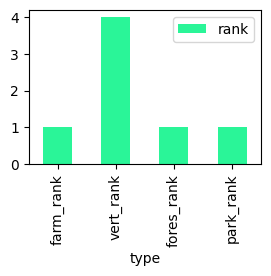

Please enter a number to select the type of planting you would like to do:
1) Farm Garden
2) Vertical
3) Forest Area
4) Park Area
Vertical planting is the type of planting you have selected


In [79]:
# Make a list of the locations from the lane dataframe
database = (lane_df['mapbase_1'].to_list())

# Ask use to yrpe in name of lane
location = input("Please input the name of your lane in the form \"Banana Alley\"")
# Check if the location is in the database
if location in database:
    # If location is in the dataframe, print a confirmation message
    print(f'The location you wish to plant is {location}')
    # Make a new interim dataframe from the single location only (1 row in size)
    df_interim = lane_df[lane_df['mapbase_1'] == location]
    # Rename columns to make sense in the graph
    
    
    print(df_interim)
    # Choose only the rank columns and trnspose the dataframe
    df_interim = df_interim[['farm_rank','vert_rank','fores_rank','park_rank']].T
    # Add index column and ranme columns
    df_interim = df_interim.reset_index().rename(columns={"index":"type"})
    df_interim = df_interim.rename(columns={df_interim.columns[1]:"rank"})	
    print(df_interim)
    # Plot the interim dataframe as a bar garph
    print("View the graph to decide which type of planting you would like to undertake")
    df_interim.plot(x="type", y=["rank"], kind="bar", figsize=(3, 2), color="#2af598")
    plt.show()
    # User chooses their option from a list
    def user_type_selection():
        options = ["Farm Garden", "Vertical", "Forest Area","Park Area"]
        print("Please enter a number to select the type of planting you would like to do:")

        for idx, element in enumerate(options):
            print("{}) {}".format(idx + 1, element))

        i = input("Make your planting selection by entering a number from 1 to 4: ")
        if 0 < int(i) <= len(options):
            choice = int(i) - 1
            global planting_type 
            planting_type = options[choice]
            print(f'{planting_type} planting is the type of planting you have selected')
        else:
            print("Please choose a number from 1 to 4")

    type_selection = user_type_selection()
    type_selection
    
    #for the option choosen, search the plant dataframe for the results greater than 3 amd return these
    
    
# If location is not in database:
else:
    print(f'Sorry, {location} is not in the data base, please check spelling or input format.')
    
    
    
    




Please choose which type of planting you would like to do:
1) Farm Garden
2) Vertical Planting
3) Forest Area
4) Park Area
Forest Area


***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```